In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# goreHeight.zip 압축 해제

import zipfile

with zipfile.ZipFile('/content/drive/MyDrive/Likenot_ML/Bra_Contours_labeled/Cup.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/Likenot_ML/Bra_Contours_labeled/Cup')

In [ ]:
# train set 불러오기

from tensorflow import keras

train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1/255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Likenot_ML/Bra_Contours_Labeled/Cup/train',
    class_mode='categorical',
    subset='training',
    color_mode='grayscale',
    batch_size=50
)

validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Likenot_ML/Bra_Contours_Labeled/Cup/train',
    class_mode='categorical',
    subset='validation',
    color_mode='grayscale',
    batch_size=50
)

Found 486 images belonging to 3 classes.
Found 119 images belonging to 3 classes.


In [ ]:
# test set 불러오기

from tensorflow import keras

test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Likenot_ML/Bra_Contours_Labeled/Cup/test',
    class_mode='categorical',
    color_mode='grayscale'
)

Found 151 images belonging to 3 classes.


In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = keras.Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='same',
                 input_shape=train_generator.image_shape))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 256, 256, 32)      320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 256, 256, 32)      9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 128, 128, 64)      18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 64, 64, 64)       

In [ ]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# EarlyStopping 설정
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', patience=10) # val_loss 기준으로 측정

In [ ]:
epochs=50

history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator, callbacks=es)

Epoch 1/50
10/10 [==============================] - 2s 151ms/step - loss: 1.0790 - accuracy: 0.4023 - val_loss: 0.9828 - val_accuracy: 0.5210
Epoch 2/50
10/10 [==============================] - 1s 128ms/step - loss: 0.9437 - accuracy: 0.5175 - val_loss: 0.9171 - val_accuracy: 0.5210
Epoch 3/50
10/10 [==============================] - 1s 128ms/step - loss: 0.9175 - accuracy: 0.5452 - val_loss: 0.9170 - val_accuracy: 0.5966
Epoch 4/50
10/10 [==============================] - 1s 131ms/step - loss: 0.9122 - accuracy: 0.5111 - val_loss: 0.8798 - val_accuracy: 0.5210
Epoch 5/50
10/10 [==============================] - 1s 130ms/step - loss: 0.8948 - accuracy: 0.5209 - val_loss: 0.8775 - val_accuracy: 0.5210
Epoch 6/50
10/10 [==============================] - 1s 130ms/step - loss: 0.8849 - accuracy: 0.5507 - val_loss: 0.8809 - val_accuracy: 0.5378
Epoch 7/50
10/10 [==============================] - 1s 131ms/step - loss: 0.8958 - accuracy: 0.4804 - val_loss: 0.8853 - val_accuracy: 0.5882
Epoch 

In [ ]:
result = model.evaluate(test_generator, steps=1)

1/1 [==============================] - 0s 91ms/step - loss: 0.9305 - accuracy: 0.5938


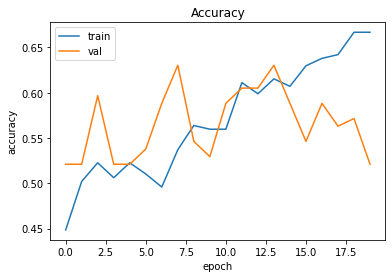

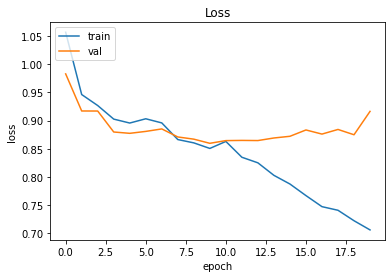

In [ ]:
# 학습 시각화하기
import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()